In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import pickle

In [3]:
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process

C:\Users\lim\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [4]:
# Storing the recipes information into a pandas DataFrame titled 'recipes'
recipes = pd.read_csv('recipes.csv', engine='python', on_bad_lines='skip')

In [5]:
# Storing the reviews information into a pandas DataFrame titled 'reviews'
reviews = pd.read_csv('reviews.csv', engine='python', on_bad_lines='skip')

# ⚡ Data pre-processing

In [6]:
# Truncating the DateSubmitted and DateModified columns
reviews=reviews[['ReviewId','RecipeId','AuthorId','AuthorName','Rating','Review']]

In [7]:
# Function for counting Null values 
def countNullValues(col):
  c = 0
  for i in col:
    if(i != i):
      c+=1
  return c

In [8]:
# Counting null values in the reviews dataframe
c1 = countNullValues(reviews.ReviewId)
c2 = countNullValues(reviews.RecipeId) 
c3 = countNullValues(reviews.AuthorId)
c4 = countNullValues(reviews.AuthorName) 
c5 = countNullValues(reviews.Rating)
c6 = countNullValues(reviews.Review) 

In [9]:
# Function for replacing Null Values
def replaceNullValue(column):
  j = 0
  for i in column:
    if(str(i) == 'nan'):
      column[j] = 'NA'
    j+=1
  return column

In [10]:
replaceNullValue(reviews.Review)

C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[j] = 'NA'
C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[j] = 'NA'
C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[j] = 'NA'
C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402

C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[j] = 'NA'
C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[j] = 'NA'
C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[j] = 'NA'
C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402

C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[j] = 'NA'
C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[j] = 'NA'
C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[j] = 'NA'
C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402

C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[j] = 'NA'
C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[j] = 'NA'
C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[j] = 'NA'
C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402

C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[j] = 'NA'
C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[j] = 'NA'
C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[j] = 'NA'
C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402

C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[j] = 'NA'
C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[j] = 'NA'
C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[j] = 'NA'
C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402

C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[j] = 'NA'
C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[j] = 'NA'
C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[j] = 'NA'
C:\Users\lim\AppData\Local\Temp\ipykernel_20472\3143402

0               better than any you can get at a restaurant!
1          I cut back on the mayo, and made up the differ...
2          i think i did something wrong because i could ...
3          easily the best i have ever had.  juicy flavor...
4                                         An excellent dish.
                                 ...                        
1401977    I was disappointed. I couldn't wait to make th...
1401978    Nothing to drain. And I don’t heat up the liqu...
1401979    Good base recipe for someone to start with. I ...
1401980    Thank you so much for this amazing recipe! I l...
1401981    I can't say enough about this recipe.... the b...
Name: Review, Length: 1401982, dtype: object

In [11]:
# Checking the column labels in reviews
reviews.columns, reviews.shape

(Index(['ReviewId', 'RecipeId', 'AuthorId', 'AuthorName', 'Rating', 'Review'], dtype='object'),
 (1401982, 6))

In [12]:
# Printing a summary of the data in reviews data
# .describe() gives the statistics of the numerical data 
reviews.describe()

,ReviewId,RecipeId,AuthorId,Rating
count,1.401982e+06,1.401982e+06,1.401982e+06,1.401982e+06
mean,8.179739e+05,1.526412e+05,1.558638e+08,4.407951e+00
std,5.280821e+05,1.301112e+05,5.305111e+08,1.272012e+00
min,2.000000e+00,3.800000e+01,1.533000e+03,0.000000e+00
25%,3.743862e+05,4.703875e+04,1.336800e+05,4.000000e+00
50%,7.717805e+05,1.093270e+05,3.305450e+05,5.000000e+00
75%,1.204126e+06,2.318768e+05,8.183590e+05,5.000000e+00
max,2.090347e+06,5.412980e+05,2.002902e+09,5.000000e+00


C:\Users\lim\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


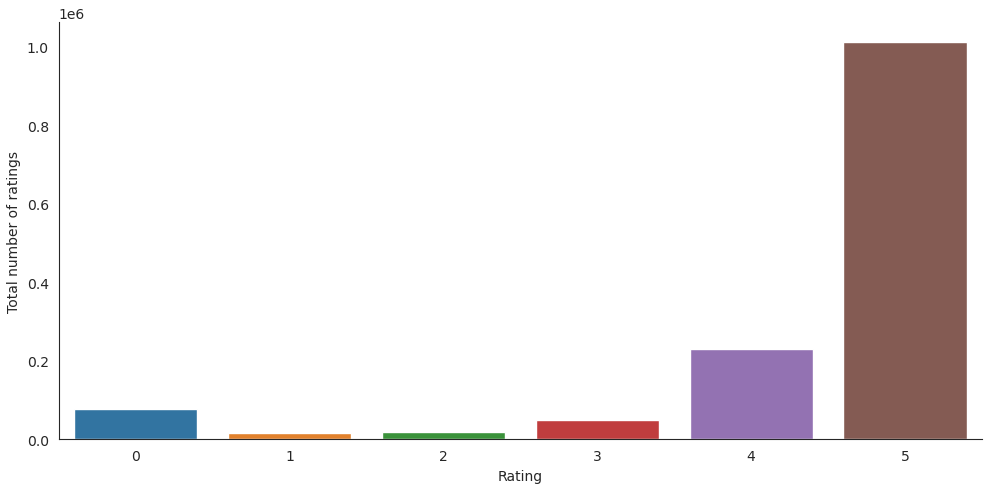

In [13]:
# Checking the Rating distribution in the range 0-5 for the Data given 
import seaborn as sns
with sns.axes_style('white'):
    g = sns.catplot(x="Rating", data=reviews, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [14]:
print("\nTotal no of ratings :", reviews.shape[0])
print("Total No of authors   :", len(np.unique(reviews.AuthorId)))
print("Total No of recipes  :", len(np.unique(reviews.RecipeId)))


Total no of ratings : 1401982
Total No of authors   : 271907
Total No of recipes  : 271678


# KNN model

In [15]:
# Setting rating count threshold
threshold = 51
counts = reviews['RecipeId'].value_counts()
valid_recipes = counts[counts >= threshold].index
valid_recipes


Index([ 45809,   2886,  27208,  89204,  39087,  67256,  35813,  54257,  22782,
        32204,
       ...
        61948,  65287, 100379,  29185,  14058, 116119, 147653, 124215,  93256,
       127262],
      dtype='int64', name='RecipeId', length=2791)

In [16]:
filtered_ratings = reviews[reviews['RecipeId'].isin(valid_recipes)]
filtered_ratings.reset_index(inplace = True, drop = True)
filtered_ratings.sort_values(by='AuthorId')

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review
3199,20057,27733,1533,Dancer,5,When I asked after the dinner party for a rati...
27618,144539,46877,1533,Dancer,5,Uncle Bill you are amazing and so are your coo...
2193,15660,26499,1533,Dancer,5,"Hi Mysterygirl, well these a wonderful. Very e..."
95482,476937,132916,1533,Dancer,5,"This was wonderful, I doubled the recipe and s..."
27913,145851,60085,1533,Dancer,5,"Uncle Bill these turned out perfect, i have to..."
...,...,...,...,...,...,...
344510,2090328,30965,2002901474,Steve W.,5,"Easiest, best I’ve ever made! Held together th..."
344511,2090330,80156,2002901627,Hayley S.,5,"I’m not typically a baker, and had never made ..."
344512,2090334,105865,2002901740,jessica92983,2,I’m not usually a big chili fan but wanted to ...
344513,2090335,153642,2002901749,kccapra,5,I omitted the sugar and these still turned out...


In [17]:
RatingCounts = filtered_ratings.groupby('RecipeId')['Rating'].count()
RatingCounts.sort_values(ascending=False, inplace=True)

In [18]:
weightedPopularRecipes = recipes.merge(RatingCounts, on='RecipeId')

In [19]:
# Columns selected to appear in shortlisted dataframe are RecipeId, Name, RecipeCategory, AggregatedRating, Rating, and ReviewCount
qualifiedRecipes = weightedPopularRecipes[(weightedPopularRecipes['Rating'] >= threshold) & (weightedPopularRecipes['Rating'].notnull()) & (weightedPopularRecipes['AggregatedRating'].notnull())][['RecipeId', 'Name', 'RecipeCategory', 'AggregatedRating', 'Rating', 'ReviewCount']]

# Setting the datatype of 'Rating' and 'AggregatedRating' to int
qualifiedRecipes['Rating'] = qualifiedRecipes['Rating'].astype('int')
qualifiedRecipes['AggregatedRating'] = qualifiedRecipes['AggregatedRating'].astype('int') 

In [20]:
qualifiedRecipes.tail()

,RecipeId,Name,RecipeCategory,AggregatedRating,Rating,ReviewCount
2786,505862,Loaded Baked Potato &amp; Chicken Casserole,Chicken,4,66,68.0
2787,508302,Sugar Cookie in a Mug or Coffee Cup,Dessert,4,59,65.0
2788,514605,Animal-Style Skillet Potatoes #SP5,Potato,5,53,63.0
2789,515167,Simply Irresistible Tropical Potato Salad #SP5,Potato,5,74,106.0
2790,533997,Pecan Pie Cheesecake,Cheesecake,4,98,101.0


In [21]:
recipe_metadata = qualifiedRecipes[['RecipeId','Name','RecipeCategory']]
recipe_metadata.tail()

,RecipeId,Name,RecipeCategory
2786,505862,Loaded Baked Potato &amp; Chicken Casserole,Chicken
2787,508302,Sugar Cookie in a Mug or Coffee Cup,Dessert
2788,514605,Animal-Style Skillet Potatoes #SP5,Potato
2789,515167,Simply Irresistible Tropical Potato Salad #SP5,Potato
2790,533997,Pecan Pie Cheesecake,Cheesecake


In [22]:
recipe_data = filtered_ratings.merge(recipe_metadata,on='RecipeId')
recipe_data

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,Name,RecipeCategory
0,19,13307,2046,Gay Gilmore ckpt,5,"chewy goodness, not crispy at all. i even thre...",Neiman-Marcus $250 Chocolate Chip Cookies Recipe,Dessert
1,253,13307,4200,LC Liu,5,"I received this ""hoax"" email forward about 4 y...",Neiman-Marcus $250 Chocolate Chip Cookies Recipe,Dessert
2,586,13307,7230,Sadie Schilk,5,This recipe is awesome! I tried it out of cur...,Neiman-Marcus $250 Chocolate Chip Cookies Recipe,Dessert
3,1309,13307,7640,Carla Kolessar,5,"If you add 2-3 tbs of espresso to this recipe,...",Neiman-Marcus $250 Chocolate Chip Cookies Recipe,Dessert
4,1566,13307,11065,Ssmilesss,4,this is an awesome recipe except that it took ...,Neiman-Marcus $250 Chocolate Chip Cookies Recipe,Dessert
...,...,...,...,...,...,...,...,...
344511,2066631,533997,1803087135,Gladys C.,4,"This came out beautifully, I did tweak the rec...",Pecan Pie Cheesecake,Cheesecake
344512,2070955,533997,2000266230,Colette J.,5,I made this for a church birthday celebration....,Pecan Pie Cheesecake,Cheesecake
344513,2077252,533997,2001658017,Anonymous,0,So far so good. I made this today with two mod...,Pecan Pie Cheesecake,Cheesecake
344514,2078274,533997,2002600455,astrosgirl05,5,This is a hit. My friends and coworkers loved ...,Pecan Pie Cheesecake,Cheesecake


In [23]:
# Get user rating matrix
user_rating_matrix = recipe_data.pivot(index = 'RecipeId', columns ='AuthorId', values = 'Rating').fillna(0)
user_rating_matrix

AuthorId,1533,1535,1581,1634,1676,1755,1792,1891,1938,1962,...,2002901044,2002901084,2002901202,2002901263,2002901271,2002901474,2002901627,2002901740,2002901749,2002901848
RecipeId,,,,,,,,,,,,,,,,,,,,,
56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
508302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Define a KNN model on cosine similarity
cf_knn_model= NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10, n_jobs=-1)


# Fitting the model on our matrix
cf_knn_model.fit(user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=10)

In [35]:
def knn_recommender(title, matrix, cf_model, n_recs):
    # Fit model on matrix
    cf_knn_model.fit(matrix)
    
    # Extract input recipe index
    recipe_index = process.extractOne(title,qualifiedRecipes['Name'])[2]
    
    # Calculate neighbour distances
    distances, indices = cf_model.kneighbors(matrix.iloc[recipe_index,:].values.reshape(1,-1), n_neighbors=n_recs)
    recipe_rec_ids = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
    
    # List to store recommendations
    cf_recs = []
    for i in recipe_rec_ids:
        cf_recs.append({'Title':qualifiedRecipes['Name'][i[0]],'Distance':i[1]})
    
    # Select top number of recommendations needed
    df = pd.DataFrame(cf_recs, index = range(1,n_recs))
     
    return df

In [36]:
n_recs = 10
knn_recommender('Pecan Pie Cheesecake', user_rating_matrix, cf_knn_model, n_recs)

,Title,Distance
1,Melt-In-Your-Mouth Chicken Breasts,0.993530
2,Kittencal's Marinara Pasta Sauce (Vegetarian),0.993461
3,5 Minute Vegan Pancakes,0.990085
4,Overnight French Toast Casserole,0.990084
5,Almond Biscotti,0.990041
6,Baby Back Ribs,0.988663
7,Crock Pot Chili Dogs,0.987316
8,Carb Free Cloud Bread,0.980589
9,Mexican Flan (Baked caramel Custard),0.977991
